<a href="https://colab.research.google.com/github/JacksonD115/CP317-Software-Project/blob/main/CP322_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Initialize data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
phi_X = np.column_stack((np.ones(X.shape[0]), X, X[:, 0] * X[:, 1])) #Gives us array: (bias, x1, x2, x1*x2)
target = np.array([0, 1, 1, 0])


initial_weights = np.array([-0.6, 2, 1.2, -2.8])
learning_rate = 0.1
num_iterations = 100
loss_history = []

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

for i in range(num_iterations):
    z = np.dot(phi_X, initial_weights)
    y = sigmoid(z)
    loss = -np.mean(target * np.log(y) + (1 - target) * np.log(1 - y)) #We use cross-entropy loss function here
    loss_history.append(loss)

    gradient = np.dot(phi_X.T, (y - target)) / len(target)
    initial_weights -= learning_rate * gradient

    if i >= num_iterations - 10:
        print(f"Iteration {i+1}: z = {z}, y = {y}, Loss = {loss:.5f}")

print("Final Weights:", initial_weights)


Iteration 91: z = [-0.70259157  0.61520122  1.11535488 -1.07933703], y = [0.33123789 0.64912636 0.75312608 0.2536315 ], Loss = 0.35263
Iteration 92: z = [-0.70226962  0.61795423  1.11550789 -1.08309375], y = [0.33130922 0.64975313 0.75315453 0.252921  ], Loss = 0.35217
Iteration 93: z = [-0.70194807  0.62070893  1.11567756 -1.08681396], y = [0.33138046 0.65037977 0.75318607 0.2522187 ], Loss = 0.35171
Iteration 94: z = [-0.70162719  0.62346484  1.11586331 -1.09049864], y = [0.33145156 0.65100616 0.7532206  0.25152439], Loss = 0.35125
Iteration 95: z = [-0.70130726  0.62622151  1.11606462 -1.0941487 ], y = [0.33152246 0.65163221 0.75325801 0.25083786], Loss = 0.35079
Iteration 96: z = [-0.70098852  0.6289785   1.11628096 -1.09776506], y = [0.3315931  0.6522578  0.75329822 0.25015889], Loss = 0.35034
Iteration 97: z = [-0.70067122  0.63173538  1.11651183 -1.10134858], y = [0.33166343 0.65288285 0.75334112 0.2494873 ], Loss = 0.34989
Iteration 98: z = [-0.70035559  0.63449176  1.11675675 

Predictions [ 0.55910755  0.14144622  0.43892486  0.92436856  0.14473213  0.46116693
 -0.21094165 -0.57505516  0.11327093 -0.26160733  0.22991912 -0.59597669
 -0.29273211 -0.16243397 -0.3076856  -0.51833351  0.70827464 -0.1462449
 -0.42255232  0.03143031  0.49711049 -0.44785533  0.74378045  1.09966755
  0.46214002 -0.1707658  -0.31319265  0.52203758  0.35329547  0.2655343
 -0.28184393  0.17190447  0.20490692  0.28030269  0.56080353 -0.20609535
  0.74396711  0.60878874 -0.58512892 -0.35293218 -0.15419224  0.33285934
  0.39186475 -0.332412    0.23815046 -0.10214349  0.676028    0.33350194
 -0.53778295  0.28211372  0.08492746  0.23237742  0.51859663  1.02145244
 -0.74114838  0.3533992   0.60929621 -0.5572074  -0.04602037  0.51452193
  0.44506533 -0.21312981 -0.74543463  0.85474017 -0.34726057 -0.28167098
  0.75312059  0.771124    0.30716757 -0.02358611 -0.62527387  0.18086897
  0.60191533  0.44813321  0.21036005  0.44451884  0.02517044 -0.57499054
  0.34518122 -0.06305462 -0.3186676  -0.0

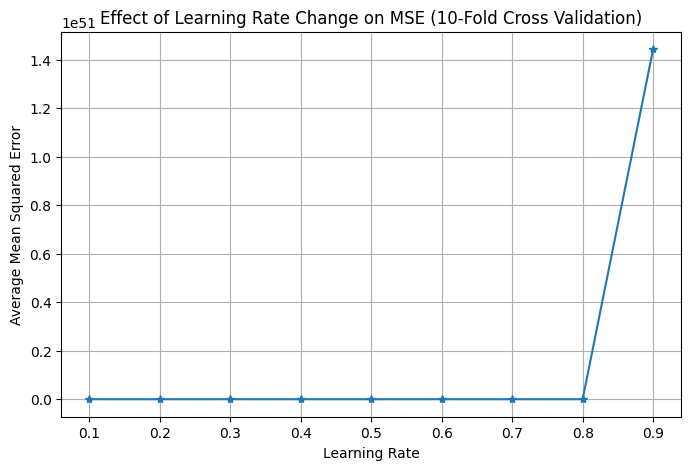

MSE with optimal learning rate: 1.4457829570001144


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

train_inputs = np.loadtxt("train_inputs.csv", delimiter=",")
train_targets = np.loadtxt("train_targets.csv", delimiter=",")
test_inputs = np.loadtxt("test_inputs.csv", delimiter=",")
test_targets = np.loadtxt("test_targets.csv", delimiter=",")

training_bias = np.c_[np.ones(train_inputs.shape[0]), train_inputs]
test_bias = np.c_[np.ones(test_inputs.shape[0]), test_inputs]

theta = np.linalg.inv(training_bias.T @ training_bias) @ training_bias.T @ train_targets

predictions = test_bias @ theta

print("Predictions", predictions)

learning_rates = np.arange(0.1, 1, 0.1)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_history = []

best_lr = None
best_mse = float("inf")

for i in learning_rates:
  if i == 0:
    mse_history.append(np.nan)
    continue
  fold_mse = []

  for train, test in kf.split(train_inputs):
    X_train, X_test = train_inputs[train], train_inputs[test]
    y_train, y_test = train_targets[train], train_targets[test]

    train_bias = np.c_[np.ones(X_train.shape[0]), X_train]
    value_bias = np.c_[np.ones(X_test.shape[0]), X_test]

    theta = np.zeros(train_bias.shape[1])

    iterations = 100

    for epoch in range(iterations):
      gradients = -2 / len(X_train) * train_bias.T @ (y_train - train_bias @ theta)
      theta -= i * gradients

    value_predictions = value_bias @ theta

    fold_mse.append(mean_squared_error(y_test, value_predictions))

  avg_mse = np.mean(fold_mse)
  mse_history.append(np.mean(fold_mse))

  if avg_mse < best_mse:
    best_mse = avg_mse
    best_lr = i

print(f"Best learning rate: {best_lr}")
print(f"Cross-validation MSE: {best_mse}")

plt.figure(figsize=(8, 5))
plt.plot(learning_rates, mse_history, marker = "*", linestyle="-")
plt.xlabel('Learning Rate')
plt.ylabel('Average Mean Squared Error')
plt.title('Effect of Learning Rate Change on MSE (10-Fold Cross Validation)')
plt.grid(True)
plt.show()

#Q3 Test mse using the optimal learning rate we found

final_theta = np.zeros(training_bias.shape[1])
iterations = 100

for epoch in range(iterations):
  gradients = -2 / len(training_bias) * training_bias.T @ (train_targets - training_bias @ final_theta)
  final_theta -= best_lr * gradients

test_predictions = test_bias @ final_theta
test_mse = mean_squared_error(test_targets, test_predictions)

print(f"MSE with optimal learning rate: {test_mse}")




In [3]:
from google.colab import files
uploaded = files.upload()

Saving train_inputs.csv to train_inputs.csv
Saving test_inputs.csv to test_inputs.csv
Saving test_targets.csv to test_targets.csv
Saving train_targets.csv to train_targets.csv
